## <b> [3단계] AI 모델링
---

## 1, 2 단계에서 진행하신 내용을 아래에 그대로 진행해주세요.

---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

* 데이터 프레임 관련 라이브러리

In [1]:
#라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

### **나.  학습데이터 불러오기**

In [13]:
path = 'train.csv'
train = pd.read_csv(path)
x_test = pd.read_csv('test.csv', index_col=0)

### **다.  데이터 전처리**

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3663 non-null   float64
 3   url_domain_len           3663 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_query_len            3664 non-null   float64
 8   url_num_query_para       3664 non-null   float64
 9   url_ip_present           3664 non-null   float64
 10  url_entropy              3664 non-null   float64
 11  url_chinese_present      3664 non-null   float64
 12  url_port                 3664 non-null   float64
 13  html_num_tags('iframe')  3664 non-null   float64
 14  html_num_tags('script') 

In [9]:
train.tail()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_chinese_present,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label
3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,4.135356,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,0.0,malicious
3660,66.0,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,4.362331,0.0,0.0,1.0,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0,0.0,benign
3661,90.0,1.0,64.0,26.0,26.0,4.0,0.0,0.0,0.0,0.0,4.693343,0.0,0.0,0.0,13.0,0.0,0.0,75.0,1.0,1.0,2.0,103.0,0.0,malicious
3662,46.0,0.0,33.0,13.0,13.0,3.0,0.0,0.0,0.0,0.0,4.604166,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0,0.0,benign
3663,18.0,0.0,0.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,3.619471,0.0,0.0,0.0,3.0,0.0,0.0,282.0,1.0,1.0,2.0,46.0,0.0,benign


In [5]:
pd.set_option('display.max_columns', 500)

In [10]:
train.shape, x_test.shape

((3664, 24), (2441, 24))

In [14]:
x_test.tail()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_chinese_present,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet')
id,,,,,,,,,,,,,,,,,,,,,,,
2436,63,0,NaN,17.0,NaN,4,2,0,0,0,4.738082,0,0,1,18.0,0,0,79,1,1,1.0,119.0,0
2437,36,0,1.0,35.0,35.0,2,0,0,0,0,4.080351,0,0,0,27.0,0,0,57,1,1,1.0,NaN,0
2438,45,1,23.0,22.0,NaN,2,0,0,0,0,4.359443,0,0,0,8.0,0,0,199,1,1,2.0,NaN,0
2439,24,0,10.0,14.0,NaN,3,0,0,0,1,4.260333,0,0,0,3.0,0,0,90,1,1,2.0,25.0,0
2440,33,2,NaN,22.0,22.0,2,0,0,0,0,4.155498,0,0,3,36.0,0,0,162,1,1,4.0,213.0,0


In [ ]:
# 중복값 삭제 안해보기
# train = train.drop_duplicates()

In [16]:
# 결측치 존재 확인
train.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
dtype: int64

In [17]:
train['url_path_len'].unique()

array([8.000e+00, 5.800e+01, 4.000e+00, 1.300e+01, 1.200e+01, 0.000e+00,
       3.000e+01, 2.200e+01, 1.000e+00, 1.900e+01, 2.000e+01, 9.100e+01,
       3.100e+01, 2.500e+01, 4.100e+01, 2.300e+01, 2.800e+01, 5.900e+01,
       1.000e+01, 1.110e+02, 9.000e+00, 4.400e+01, 4.900e+01, 4.500e+01,
       8.600e+01, 3.300e+01, 2.400e+01, 1.100e+01, 3.400e+01, 8.300e+01,
       1.250e+02, 2.700e+01, 1.260e+02, 5.200e+01, 1.400e+01, 1.500e+01,
       1.040e+02, 1.780e+02, 1.800e+01, 3.800e+01, 1.700e+01, 3.500e+01,
       7.000e+01, 5.700e+01, 1.060e+02, 6.400e+01, 3.700e+01, 6.100e+01,
       6.000e+00, 6.500e+01, 4.300e+01, 3.200e+01, 5.500e+01, 1.127e+03,
       4.800e+01, 6.600e+01, 2.440e+02, 5.300e+01, 4.000e+01, 1.570e+02,
       7.000e+00, 5.070e+02, 1.220e+02, 2.600e+01, 1.440e+02, 5.100e+01,
       3.900e+01, 2.100e+01, 2.000e+00, 3.600e+01, 2.020e+02, 8.400e+01,
       8.660e+02, 1.600e+01, 6.200e+01, 4.600e+01, 4.200e+01, 2.780e+02,
       1.030e+02, 9.600e+01, 4.700e+01, 5.400e+01, 

In [18]:
# text 데이터 숫자로 바꾸기
train['label'] = train['label'].replace(['benign', 'malicious'], [0, 1])
np.unique(train['label'])
# 다중공산성으로 correlation (상관관계가 무조건 1임)

array([0, 1], dtype=int64)

In [19]:
# 결측치 제거 >> meadian으로 채우기
train['url_path_len'].fillna(train['url_path_len'].median(), inplace=True)
train['url_domain_len'].fillna(train['url_domain_len'].median(), inplace=True)

In [21]:
train.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               0
url_domain_len             0
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
label_binary               0
dtype: int64

In [23]:
train['html_num_tags(\'applet\')'].unique()

array([0.])

In [28]:
# chinese, aplet >>> 0밖에 없음 >> 날려
data = train.copy()


In [29]:
drop_cols = ['url_chinese_present', 'html_num_tags(\'applet\')']
data.drop(drop_cols, axis=1, inplace=True)

In [30]:
data

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),label,label_binary
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,0.0,0.0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,malicious,1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,0.0,0.0,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,benign,0
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,3.708966,0.0,1.0,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,benign,0
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,0.0,0.0,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,benign,0
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,0.0,0.0,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,benign,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,4.135356,0.0,0.0,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,malicious,1
3660,66.0,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,4.362331,0.0,1.0,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0,benign,0
3661,90.0,1.0,64.0,26.0,26.0,4.0,0.0,0.0,0.0,0.0,4.693343,0.0,0.0,13.0,0.0,0.0,75.0,1.0,1.0,2.0,103.0,malicious,1
3662,46.0,0.0,33.0,13.0,13.0,3.0,0.0,0.0,0.0,0.0,4.604166,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0,benign,0


### **라. train_test_split을 이용하여 train/test  데이터 분리**



In [42]:
data.drop('label', axis=1, inplace=True)

In [43]:
from sklearn.model_selection import train_test_split

x = data.iloc[:, 0:len(data.columns) - 1].values
# 혹은 x = data.drop['label', axis = 1, inplace = True]
y = data.iloc[:, len(data.columns) - 1].values

In [44]:
# train_test_split 사용
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2021)


In [45]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2564, 21), (1100, 21), (2564,), (1100,))

#### MinMax Scaling
> KNN, SVM만

### **마. Confusion Matrix 함수 정의**


#### Confusion Matrix란 Training 을 통한 Prediction 성능을 측정하기 위해 예측 value와 실제 value를 비교하기 위한 표입니다.
#### 아래 함수는 이번 과제에서 confusion matrix 결과를 보기 쉽게 표현한 것으로 사용 예를 참고하여 모델 결과 확인에 사용하시기 바랍니다.



**<span style="color:green">[참고링크] 공식 Document**</span>
 
* confusion matrix(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [37]:
from sklearn.metrics import classification_report as creport
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [73]:
def plot_confusion_matrix(ax, matrix, labels = ['malicious','benign'], title='Confusion matrix', fontsize=9):
    ax.set_xticks([x for x in range(len(labels))])
    ax.set_yticks([y for y in range(len(labels))])

    # Place labels on minor ticks
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_xticklabels(labels, rotation='90', fontsize=fontsize, minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    # Hide major tick labels
    ax.tick_params(which='major', labelbottom='off', labelleft='off')

    # Finally, hide minor tick marks
    ax.tick_params(which='minor', width=0)

    # Plot heat map
    proportions = [1. * row / sum(row) for row in matrix]
    ax.pcolor(np.array(proportions[::-1]), cmap=plt.cm.Blues)

    # Plot counts as text
    for row in range(len(matrix)):
        for col in range(len(matrix[row])):
            confusion = matrix[::-1][row][col]
            if confusion != 0:
                ax.text(col + 0.5, row + 0.5, int(confusion),
                        fontsize=fontsize,
                        horizontalalignment='center',
                        verticalalignment='center')

    # Add finishing touches
    ax.grid(True, linestyle=':')
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('prediction', fontsize=fontsize)
    ax.set_ylabel('actual', fontsize=fontsize)

    plt.show()

### <span style="color:blue">[예시] Confusion Matrix 사용 방법<span>

- 샘플
#### > confusion = confusion_matrix(test_y, dt_pred)
#### > fig, ax = plt.subplots(figsize=(10,3))
#### > plot_confusion_matrix(ax, confusion, fontsize=30)


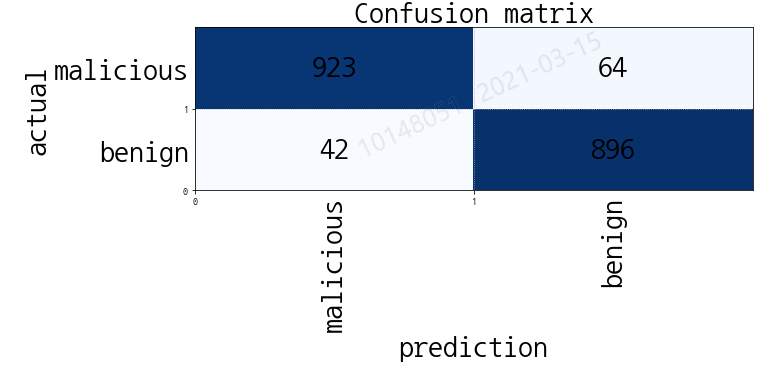

---

## <b> Q. AI 분류 모델 만들기

* 전처리한 데이터셋을 활용해 악성사이트 여부를 판별하는 AI 분류 모델을 <font color="red">최소 3개 이상 </font>만들어보세요.

#### 1) Decision Tree

In [58]:
# 1. import
from sklearn.tree import DecisionTreeClassifier

# 평가지표
from sklearn.metrics import classification_report, confusion_matrix



In [59]:
# 2.선언 
dt_model = DecisionTreeClassifier(max_depth=5, random_state=2021)



In [60]:
# 3. fit(), 학습
dt_model.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=2021)

In [62]:
# 4. predict(), 예측
dt_y_pred = dt_model.predict(x_test)




In [63]:
# 5. 평가하기
print(confusion_matrix(y_test, dt_y_pred))
print(classification_report(y_test, dt_y_pred))

[[512  35]
 [ 65 488]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       547
           1       0.93      0.88      0.91       553

    accuracy                           0.91      1100
   macro avg       0.91      0.91      0.91      1100
weighted avg       0.91      0.91      0.91      1100



##### 성능 검증

In [66]:
# train 및 val 데이터 정확도 확인 
# validation data로 한번 확인해 봐라
from sklearn.model_selection import cross_val_score

dt_cv_score = cross_val_score(dt_model, x_train, y_train, cv = 5).mean()
print('예상되는 cross validation score:', dt_cv_score)



예상되는 cross validation score: 0.908733095760234


[[512  35]
 [ 65 488]]


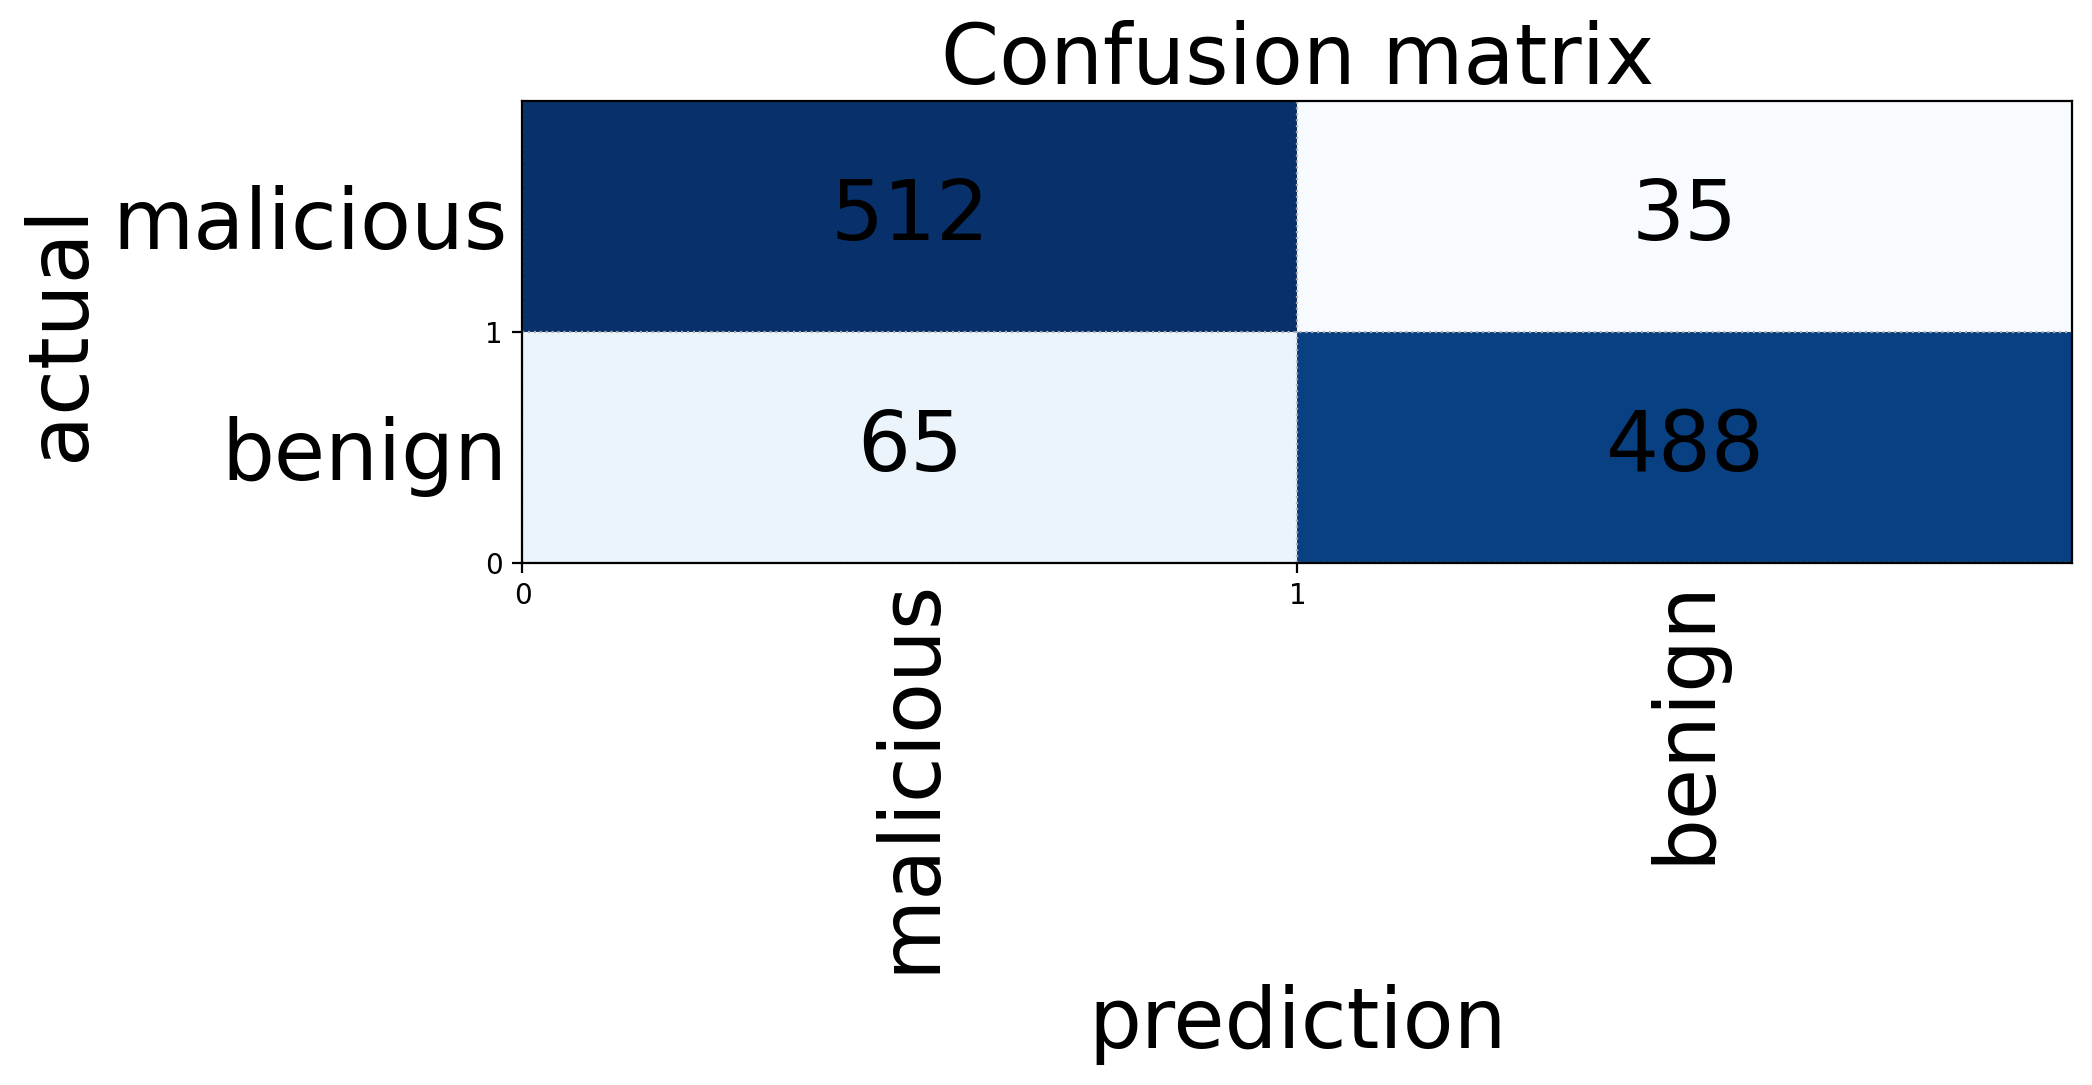

In [75]:
# Test 데이터 결과 Confusion Matrix 확인
print(confusion_matrix(y_test, dt_y_pred))

confusion = confusion_matrix(y_test, dt_y_pred)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

In [70]:
data

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),label_binary
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,0.0,0.0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,0.0,0.0,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,3.708966,0.0,1.0,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,0.0,0.0,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,0.0,0.0,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,4.135356,0.0,0.0,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,1
3660,66.0,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,4.362331,0.0,1.0,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0,0
3661,90.0,1.0,64.0,26.0,26.0,4.0,0.0,0.0,0.0,0.0,4.693343,0.0,0.0,13.0,0.0,0.0,75.0,1.0,1.0,2.0,103.0,1
3662,46.0,0.0,33.0,13.0,13.0,3.0,0.0,0.0,0.0,0.0,4.604166,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0,0


In [71]:
# feature importance를 보기 위한 label_binary 값 제거
x = data.copy()
x.drop('label_binary', axis=1, inplace=True)
x

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a')
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,4.260333,0.0,0.0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,4.636107,0.0,0.0,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,3.708966,0.0,1.0,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,4.025592,0.0,0.0,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,4.631833,0.0,0.0,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,4.135356,0.0,0.0,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0
3660,66.0,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,4.362331,0.0,1.0,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0
3661,90.0,1.0,64.0,26.0,26.0,4.0,0.0,0.0,0.0,0.0,4.693343,0.0,0.0,13.0,0.0,0.0,75.0,1.0,1.0,2.0,103.0
3662,46.0,0.0,33.0,13.0,13.0,3.0,0.0,0.0,0.0,0.0,4.604166,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0


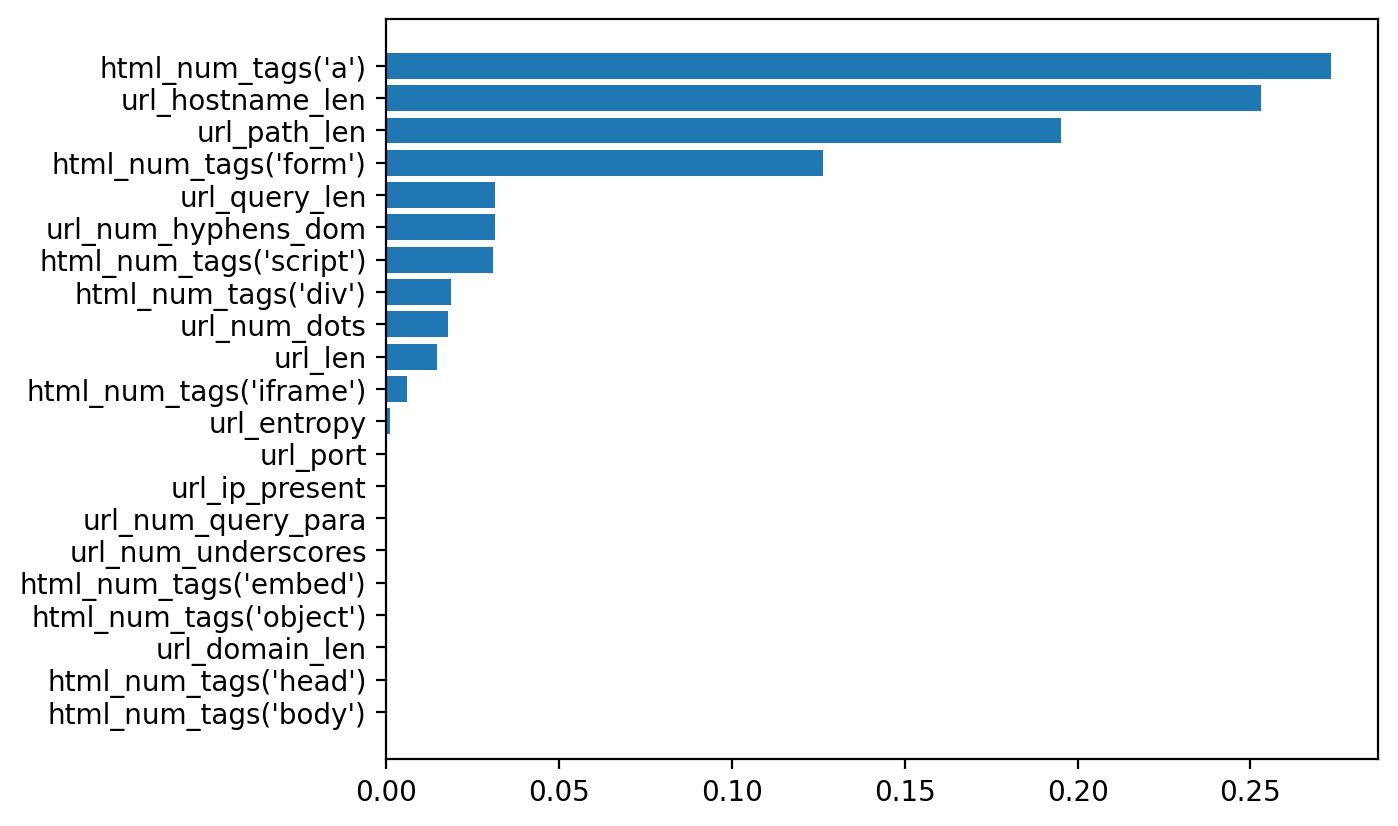

In [72]:
# Feature(특징)별 가중치 확인
# feature importance는 dt와 rf, xgboost, lgb만 가능 
# x.columns랑 list(x)가 같음

df = pd.DataFrame({'feature': list(x), 'importance': dt_model.feature_importances_})
df = df.sort_values(by = 'importance', ascending=True)
plt.barh(df['feature'], df['importance'])
plt.show()

In [34]:
data.columns

Index(['Unnamed: 0', 'url_len', 'url_num_hyphens_dom', 'url_path_len',
       'url_domain_len', 'url_hostname_len', 'url_num_dots',
       'url_num_underscores', 'url_query_len', 'url_num_query_para',
       'url_ip_present', 'url_entropy', 'url_port', 'html_num_tags('iframe')',
       'html_num_tags('script')', 'html_num_tags('embed')',
       'html_num_tags('object')', 'html_num_tags('div')',
       'html_num_tags('head')', 'html_num_tags('body')',
       'html_num_tags('form')', 'html_num_tags('a')',
       'html_num_tags('applet')', 'label_binary'],
      dtype='object')

In [39]:
# data.drop('Unnamed: 0', axis=1, inplace=True)

In [40]:
# data.columns

Index(['url_len', 'url_num_hyphens_dom', 'url_path_len', 'url_domain_len',
       'url_hostname_len', 'url_num_dots', 'url_num_underscores',
       'url_query_len', 'url_num_query_para', 'url_ip_present', 'url_entropy',
       'url_port', 'html_num_tags('iframe')', 'html_num_tags('script')',
       'html_num_tags('embed')', 'html_num_tags('object')',
       'html_num_tags('div')', 'html_num_tags('head')',
       'html_num_tags('body')', 'html_num_tags('form')', 'html_num_tags('a')',
       'html_num_tags('applet')', 'label_binary'],
      dtype='object')


(process:21588): GLib-GIO-WARNING **: 12:04:34.756: Unexpectedly, UWP app `64343GTDocStudio.OfficeDocOpener_3.3.2.0_x86__3h5nez1g3qt2c' (AUMId `64343GTDocStudio.OfficeDocOpener_3h5nez1g3qt2c!App') supports 205 extensions but has no verbs


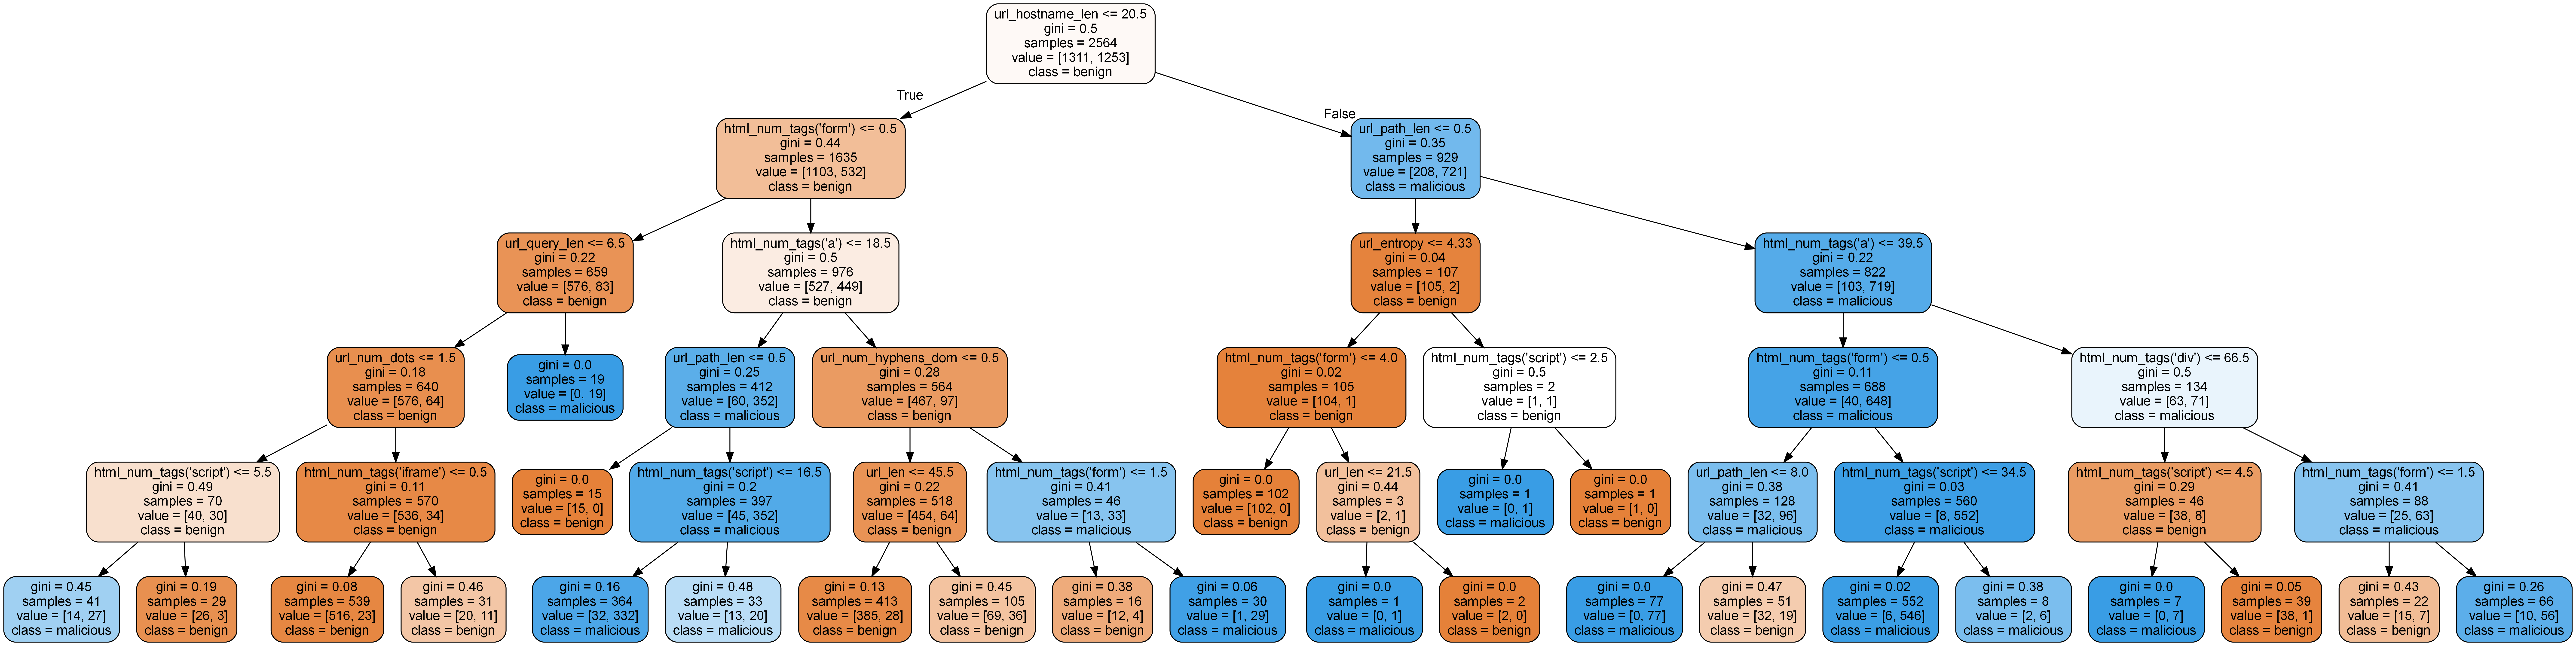

In [77]:
# Decision Tree 시각화
from sklearn.tree import export_graphviz
from IPython.display import Image

# 이미지 파일 만들기
export_graphviz(dt_model,
                out_file='bad_site_tree.dot',
                feature_names=x.columns,
                class_names=['benign', 'malicious'],
                rounded=True,
                precision=2,
                max_depth=5,
                filled=True) 

# 파일 변환
!dot bad_site_tree.dot -Tpng -obad_site_tree.png -Gdpi=300

# 이미지 파일 표시
Image(filename='bad_site_tree.png')

##### 파라미터 튜닝 - K-Fold 교차검증 CV, f1 score 확인

In [81]:
# max_depth:1 ~ 10, 반복문을 사용해 맥스뎁스값 바꿔가며 성능검증
result = []
for n in range(1, 11):
    dt_model = DecisionTreeClassifier(max_depth=n, random_state=2021)
    cv_score = cross_val_score(dt_model, x_train, y_train, cv=5, scoring='f1')
    result.append(cv_score.mean())

# 확인
result = np.array(result)
print('f1 score 성능정보:', result.round(2))
print('f1 score 최고성능:', result.max().round(2))
print('최적의 파라미터:', result.argmax() + 1)

성능정보: [0.68 0.69 0.84 0.88 0.9  0.9  0.92 0.92 0.93 0.92]
최고성능: 0.93
파라미터: 9


##### 튜닝한 파라미터값으로 

In [ ]:
from 